# k-Means Clustering from Scratch

## Prepare the Data

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read in the soccer_players CSV file
players = pd.read_csv("players_22.csv")

C:\Users\Olivetti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Take a look at the dataframe
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


Specific info about this data can be found [here](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset).

### Selecting Features and Target Variable

In [4]:
# We will only use the following 5 features
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
# Drop any row with missing values
players = players.dropna(subset=features)

In [6]:
# Separate the data we'll work with
data = players[features].copy()

In [7]:
# Take a look at the data
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


### Normalizing the Data

Since k-Means Clustering uses the euclidean distance to assign the samples to the clusters, we need to normalize the data to make sure all features have the same bearing in the calculations. In this case, we will normalize the data pushing every feature into the range [0, 100]. We use this scale because, especially since we are talking about ratings and players strenght, it is somewhat more intuitive to interpret rather than the standard [0, 1] one.

In [8]:
# Normalize the data using the min/max scaler and pushing the data into the [0, 100] range
data = (data - data.min()) / (data.max() - data.min()) * 100

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,40.783017,47.999977,2.438261,1.464734,34.037163
std,14.962616,13.234175,5.572534,3.924770,17.509315
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.434783,39.130435,0.143062,0.240217,18.518519
50%,41.304348,47.826087,0.715308,0.497961,33.333333
75%,50.000000,56.521739,2.145923,1.026336,48.148148
max,100.000000,100.000000,100.000000,100.000000,100.000000


## Implement k-Means Clustering from Scratch

### Pseudo Code of the k-Means Clustering Algorithm

0. Initialize a counter $i = 0$ for the number of iterations performed.
1. Start the algorithm choosing randomly `n_clusters` centroids (here the `n_clusters` is an integer hyperparameter that is set at the beginning of the algorithm). Each of this centroids represents the center of a cluster.
2. Assign each sample to the cluster corresponding to the centroid with minimal distance to it.
3. Update the centroids using the geometric mean of all samples in each cluster.  
4. Increase $i$ by 1.
5. If $i >$ `max_iterations` (where `max_iterations` is an integer hyperparameter fixed at the beginning) or if the centroids haven't moved, stop; else go back to step 2.

### Coding Step 1

The general goal when picking the initial centroids is to do it so that they are as "spread out" as possible. This usually helps the algorithm converging faster. There are known strategies that achieve this task efficiently (those who are curious to learn more about this topic can refer to [this paper](https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf)). Here we will just choose the centroids picking each time a random sample coordinate. This will at least minimize the risk of getting centroids that are really close to each other.   

In [10]:
def random_centroids(data, n_clusters):
    """
    Choose the samples which will serve as the initial centroids.
    
    :param data: the samples to cluster
    :type data: pandas.DataFrame of shape (n_samples, n_features)
    :param n_cluster: the number of clusters to use
    :type n_cluster: int
    
    :return: a pandas.DataFrame whose columns correspond to the centroids
    """
    
    # Initialize an empty list to contain the centroids
    centroids = []
    
    # Start the iterations to choose the centroids
    for i in range(n_clusters):
        
        # Choose the centroid pciking random values from each column
        centroid = data.apply(lambda x : float(x.sample()))
        # Add the centroid we picked to the list of all centroids
        centroids.append(centroid)
        
    return pd.concat(centroids, axis = 1)    

In [11]:
# Test the function
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,28.260870,8.695652,28.260870,36.956522,39.130435
potential,52.173913,50.000000,84.782609,23.913043,56.521739
wage_eur,7.010014,0.429185,0.000000,0.143062,0.143062
value_eur,0.214443,0.150007,0.162894,0.317541,0.923239
age,40.740741,44.444444,14.814815,59.259259,18.518519


### Coding Step 2

In [12]:
def get_labels(data, centroids):
    """
    Assigns to each sample the label of the cluster it belongs to.
    The cluster assignment is based on the Euclidean distance between the sample and the centroids.
    
    :param data: the samples to cluster
    :type data: pandas.DataFrame of shape (n_samples, n_features)
    :param centroids: the clusters' centroids
    :type centroids: pandas.DataFrame of shape (n_features, n_clusters)
    
    :return: a pandas.Series of shape (n_samples,) with the labels of the clusters each sample was assigned to
    """
    
    # Calculate the distance between each sample and each centroid
    distances = centroids.apply(lambda x : np.sqrt((data - x) ** 2).sum(axis = 1))
    
    # For each sample find the centroid with minimal distance
    nearest_centroids = distances.idxmin(axis = 1)
    
    return nearest_centroids

In [13]:
# Test the function
labels = get_labels(data, centroids)
labels.value_counts()

4    8809
0    4863
3    4227
1     934
2     332
dtype: int64

In [14]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,100.000000,95.652174,91.416309,40.203411,66.666667
1,97.826087,93.478261,77.110157,61.596157,59.259259
2,95.652174,91.304348,77.110157,23.192313,74.074074
3,95.652174,91.304348,77.110157,66.493291,48.148148
4,95.652174,91.304348,100.000000,64.689084,51.851852


### Coding Step 3

In [15]:
def new_centroids(data, labels, n_clusters):
    """
    Update the centroids using the geometric mean of the samples in each cluster.
    
    :param data: the samples to cluster
    :type data: pandas.DataFrame of shape (n_samples, n_features)
    :param labels: the labels denoting the cluster each sample belongs to
    :type labels: pandas.Series of shape (n_samples,)
    :param n_cluster: the number of clusters to use
    :type n_cluster: int  
    
    :return: a pandas.DataFrame whose columns correspond to the new centroids
    """
    
    # Group the samples in clusters following the labels
    clusters = data.groupby(labels)
    # Find the new centroids by calculating the geometric mean of the samples in each cluster
    updated_centroids = clusters.apply(lambda x : x.mean()).T # We transpose to make sure we get
                                                                              # the centroids on the columns as
                                                                              # that's what we did before
        
    return updated_centroids

In [16]:
# Test the function
updated_centroids = new_centroids(data, labels, 5)
updated_centroids

,0,1,2,3,4
overall,50.787222,10.515781,54.963332,40.066447,38.278786
potential,49.700042,31.163300,78.116815,36.049825,53.445834
wage_eur,5.214497,0.156433,10.896117,0.811234,1.609544
value_eur,2.482813,0.079966,12.191733,0.325706,1.191804
age,43.564786,17.320961,15.316823,55.232237,21.084917


### Coding Function to Visualize Clusters

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
    """
    Visualize the clusters generated by the k-Means Algorithm at a given iteration.
    
    :param data: the samples to cluster
    :type data: pandas.DataFrame of shape (n_samples, n_features)
    :param labels: the labels denoting the cluster each sample belongs to
    :type labels: pandas.Series of shape (n_samples,)
    :param centroids: the clusters' centroids
    :type centroids: pandas.DataFrame of shape (n_features, n_clusters)
    :param iteration: the number of iterations already performed by the k-Means Algorithm  
    :type iteration: int
    """
    # Perform dimensionality reduction in order to be able to visualize the samples and the clusters
    pca = PCA(n_components = 2)    # We use 2 components so that we can use planar plots 
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T) # We transpose again to put the centroids back on the columns
    
    # Delete the picture created in the previous iteration
    clear_output(wait = True)
    
    # Draw the picture for the current iteration
    plt.title(f"Iteration {iteration}")
    plt.scatter(x = data_2d[:, 0], y = data_2d[:,1], c = labels) # We use different colors to draw each cluster
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:,1], c = "r")
    plt.show()
    
    return

### Coding the Entire Algorithm

In [18]:
def k_means_clustering(X, n_clusters = 8, max_iterations = 300): # We set the same hyperparameter default values used by
                                                                 # sklearn's instance of k-Means Clustering 
    """
    Run the k-Means Algorithm and draw a scatterplot of the data at each iteration.
    
    :param X: the samples to cluster
    :type X: pandas.DataFrame of shape (n_samples, n_features)
    :param n_cluster: the number of clusters to use
    :type n_cluster: int, default = 8
    :param max_iterations: the max number of iterations to perform
    :type max_iterations: int, default = 300
    
    :return: centroids, the clusters' centroids at the moment the algorithm stops
             labels, the labels denoting the cluster each sample belongs to 
    """
    
    # STEP 0: initialize the iterations count
    iteration = 0
    
    # STEP 1: pick randomly the initial centroids
    centroids = random_centroids(data, n_clusters)
    
    # Initialize a dataframe to keep track of the centroids at each previous step
    old_centroids = pd.DataFrame()
    
    # test STEP 5 conditions: keep iterating until we reach the max number of iterations or the centroids don't change
    while (iteration < max_iterations) and not (centroids.equals(old_centroids)):
        
        # The current centroids become outdated
        old_centroids = centroids
        
        # STEP 2: assign the samples to the clusters
        labels = get_labels(data, centroids)
        
        # STEP 3: calculate the new centroids
        centroids = new_centroids(data, labels, n_clusters)
        
        # Plot the data
        plot_clusters(data, labels, centroids, iteration)
        
        # STEP 4: increase the iterations count
        iteration +=1
        
    return centroids, labels

### Visualizing the Clusters

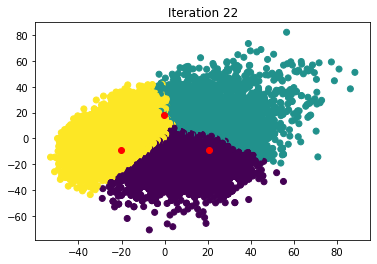

In [19]:
# Set the hyperparameters and run the algorithm
n_clusters = 3
max_iterations = 100

final_centroids, labels = k_means_clustering(data, n_clusters, max_iterations)

### Exploring the Clusters

In [20]:
# Print the number of players in each cluster
labels.value_counts()

2    8317
0    7081
1    3767
dtype: int64

In [21]:
# Print the final centroids
final_centroids

,0,1,2
overall,42.094890,61.360672,30.345913
potential,39.308192,63.785621,48.250310
wage_eur,1.183889,8.936522,0.562976
value_eur,0.464327,5.512439,0.483151
age,49.384634,38.648497,18.881897


Inspecting the coordinate of the centroids, it looks like cluster 2 represent young players with low rating, low salaries but good potential.

In [22]:
# Print players in cluster 2
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
2248,Caio Nunson,74,74,9000.0,4400000.0,21
2258,Victorino Magela,74,74,6000.0,3700000.0,21
2866,Osvaldão Murilo,73,73,9000.0,3100000.0,21
2871,Nicolás Formido,73,73,16000.0,3600000.0,21
2877,Neviano Neves,73,73,17000.0,3600000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


Cluster 0 consists of experienced players medium rating, low potential and decent salaries.

In [23]:
# Print players in cluster 0
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
1967,J. Hansen,74,74,7000.0,475000.0,36
1970,S. Viera,74,74,2000.0,475000.0,38
1979,L. Schøne,74,74,9000.0,1700000.0,35
1986,R. Fährmann,74,74,9000.0,2100000.0,32
1987,Fernandinho Silva,74,74,7000.0,1700000.0,35
...,...,...,...,...,...,...
19012,A. Paul,50,55,500.0,50000.0,26
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36
19118,Gao Xiang,49,49,2000.0,35000.0,32


Finally, Cluster 0 consists of players in their prime with high rating, high potential and high salaries.

In [24]:
# Print players in cluster 1
players[labels == 1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
6983,J. Simpson,68,76,15000.0,2500000.0,24
7103,R. Meshino,68,76,35000.0,2700000.0,23
7115,H. Abe,68,78,35000.0,2700000.0,22
7116,E. Zaldívar,68,77,5000.0,2500000.0,24


## Comparing my Algorithm to sklearn's Implementation of k-Means Clustering

In [25]:
from sklearn.cluster import KMeans

# Instantiate and fit an instance of sklearn's k-Means Clustering algorithm
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [26]:
# Print the final centroids
pd.DataFrame(kmeans.cluster_centers_.T, index = features)

,0,1,2
overall,28.855991,58.071374,42.227897
potential,46.720262,62.448090,38.926672
wage_eur,0.443119,7.277191,1.253223
value_eur,0.396673,4.581982,0.444290
age,19.003805,34.872954,51.214468


In [27]:
# Print the number of iterations performed
kmeans.n_iter_

13

Modulo a permutation of the labels (which doesn't really have any intrinsic meaning), the clusters obtained by sklearn are similar to the ones we got. Our algorithm, however, needed more iterations to converge; this is most likely because sklearn initializes the centroids using a method more efficient than the one we used.  